### Generate Images

In [50]:
import pandas as pd
from matplotlib import pyplot as plt
import math
from itertools import cycle, islice
import numpy as np
import os

import os
import pandas as pd
from datetime import datetime

def get_visualization_all(path_general="results/data", data_sizes=None, file_types=None):
    if data_sizes is None:
        data_sizes = ["Scale3"]#, "Scale4", "Scale5", "Scale6"]
    if file_types is None:
        file_types = ["historical_load", "incremental_load", "overall_stats"]

    if type(file_types) == str:
        file_types = [file_types]

    most_recent_files = []
    for file_type in file_types:
        for data_size in data_sizes:
            # Construct a search pattern for the desired file type and scale
            pattern = f"{file_type}_{data_size}"

            # Find all matching files in the directory
            matching_files = [
                os.path.join(path_general, f) for f in os.listdir(path_general)
                if pattern in f
            ]
            if matching_files:
                # Sort matching files by modification time (most recent first)
                matching_files.sort(key=lambda x: os.path.getmtime(x), reverse=True)

                # Take the most recent file
                most_recent_file = matching_files[0]
                most_recent_files.append(most_recent_file)

    # Load and concatenate the most recent files into a single DataFrame
    dfs = []
    for file_path in most_recent_files:
        df = pd.read_csv(file_path)

        # Extract metadata from the filename
        file_name = os.path.basename(file_path)
        for file_type in file_types:
            if file_type in file_name:
                df['file_type'] = file_type
                break
        for data_size in data_sizes:
            if data_size in file_name:
                df['scale'] = data_size
                break

        df['file_name'] = file_name
        df['last_modified'] = datetime.fromtimestamp(os.path.getmtime(file_path)).strftime('%Y-%m-%d %H:%M:%S')
        dfs.append(df)

    df_final = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()
    return df_final


def create_mail_images(data_sizes = ["Scale3","Scale4","Scale5", "Scale6"]):
    folder_base=f"{os.getcwd()}/results/data"
    temp_folder_img=f"{os.getcwd()}/images/"

    df_all_overal = get_visualization_all(folder_base,data_sizes, file_types="overall_stats")
    df_all_historical = get_visualization_all(folder_base,data_sizes, file_types="historical_load")
    df_all_incremental = get_visualization_all(folder_base,data_sizes, file_types="incremental_load")
    c = '#7eb54e'

    for k in ["create_db_time","et","rows","throughput"]:
        df_all_plt_historical =df_all_historical.pivot_table(
            index='scale', values=k).plot(kind='bar', rot=0, figsize=(15,7), title=f"Historical {k}",color = c)
        df_all_plt_historical.figure.savefig(temp_folder_img+f"historical_stats_{k}.png")

    for k in ["et","rows","throughput"]:
        df_all_plt_incremental =df_all_incremental.pivot_table(
            index='scale', values=k).plot(kind='bar', rot=0, figsize=(15,7), title=f"Incremental {k}",color = c)
        df_all_plt_incremental.figure.savefig(temp_folder_img+f"incremental_stats_{k}.png")

    df_all_historical["Type"]="Historical"
    df_all_incremental["Type"]="Incremental"

    df_all_incremental_historical =pd.concat([df_all_historical,df_all_incremental], ignore_index=True)
    for k in ["et","rows","throughput"]:
        df_all_plt_incremental_historical =df_all_incremental_historical.pivot_table(
            index='scale',columns="Type", values=k).plot(kind='bar', rot=0, figsize=(15,7), title=f"Comparison incremental and historical {k}")
        df_all_plt_incremental_historical.figure.savefig(temp_folder_img+f"incremental_historical_stats_{k}.png")

    for k in ["TPC_DI_RPS"]:
        df_all_plt_overal =df_all_overal.pivot_table(
            index='scale', values=k).plot(kind='bar', rot=0, figsize=(15,7), title=f"Overall {k}",color = c)
        df_all_plt_overal.figure.savefig(temp_folder_img+f"overall_stats_{k}.png")


    
    return []

In [56]:
folder_base=f"{os.getcwd()}/results/data"

df_all_overal = get_visualization_all(folder_base, 'Scale3', file_types="historical_load")
df_all_overal

,create_db_time,et,rows,throughput,file_type,scale,file_name,last_modified
0,2.895278,490.182581,173280996,353502.965325,historical_load,S,historical_load_Scale3_TTWKVD.csv,2024-12-21 13:54:04


[]

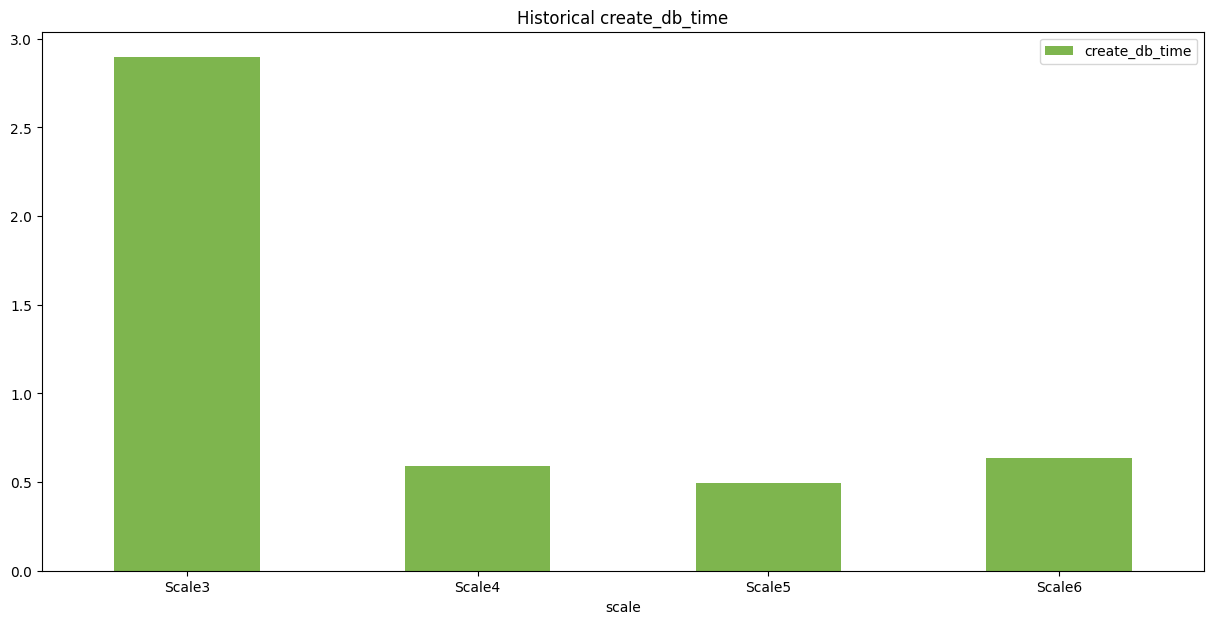

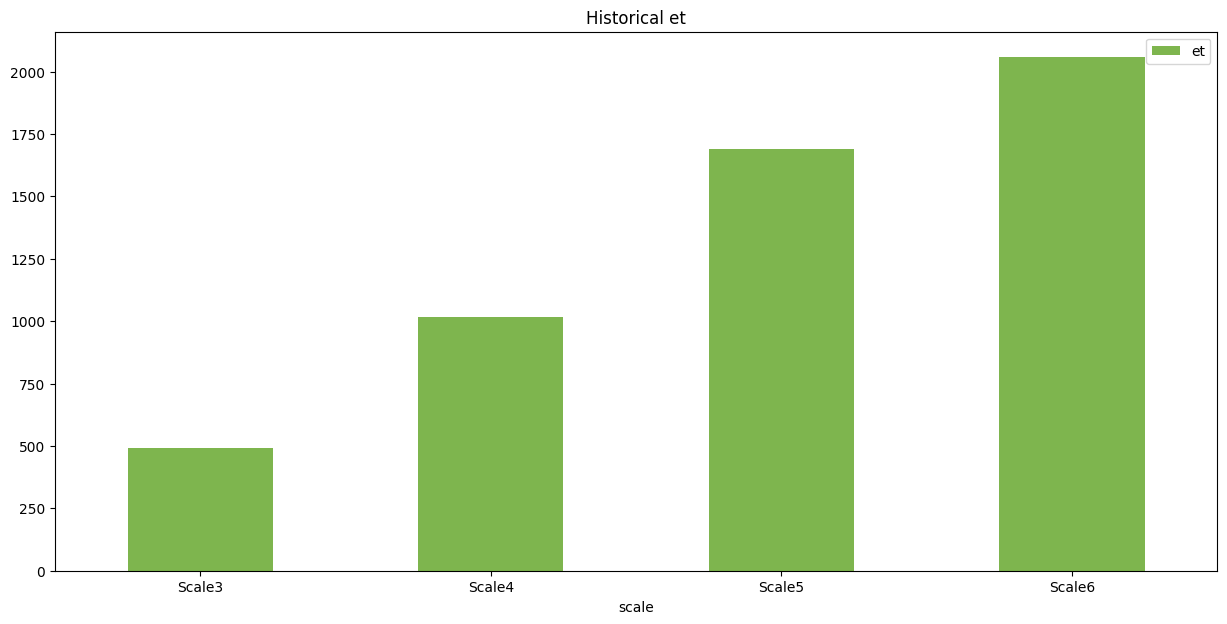

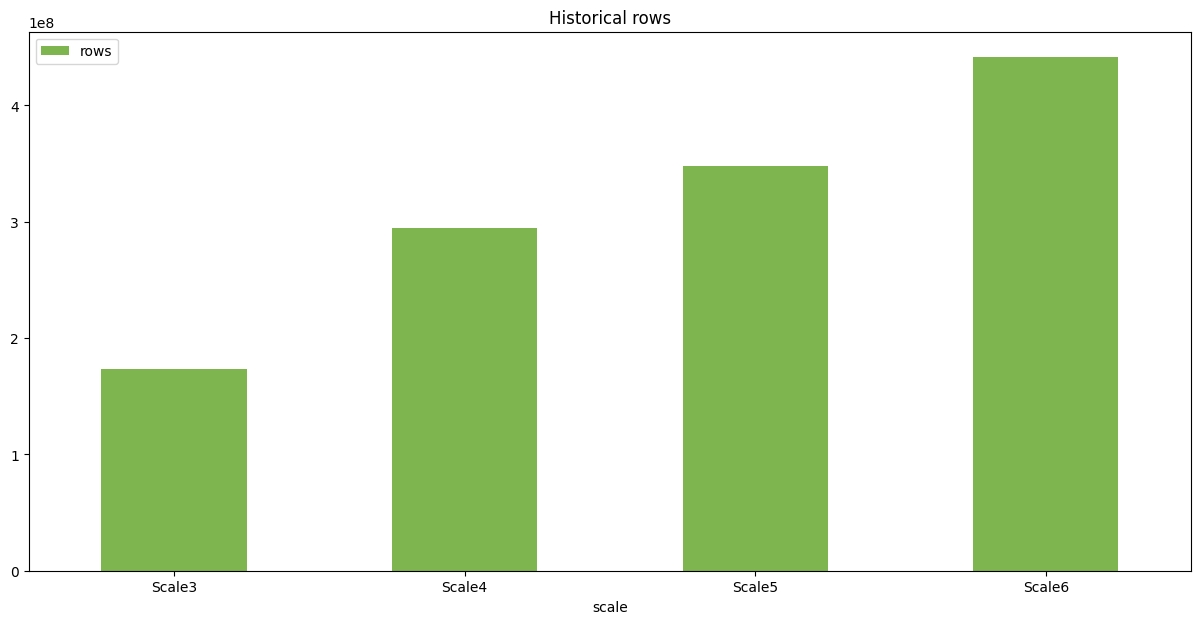

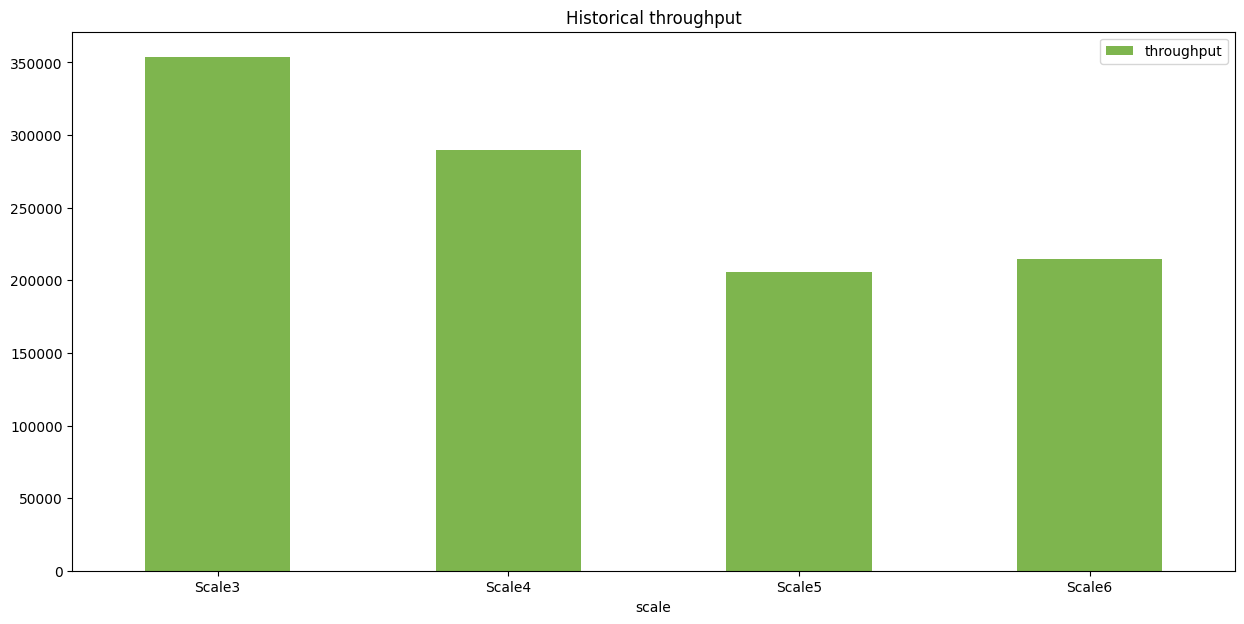

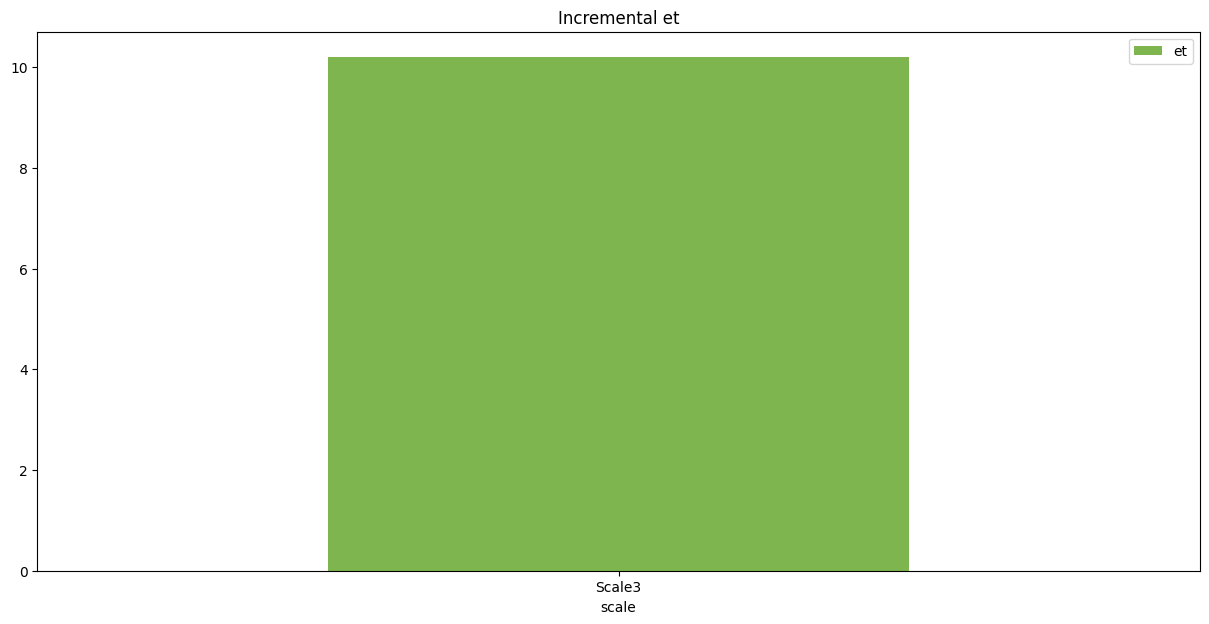

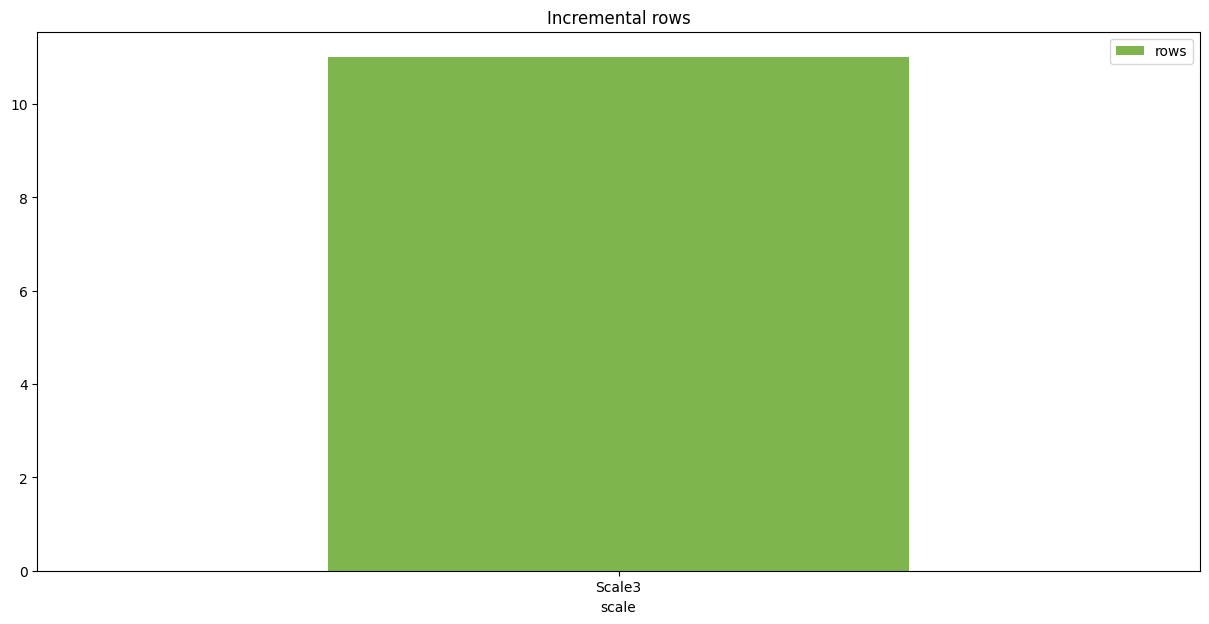

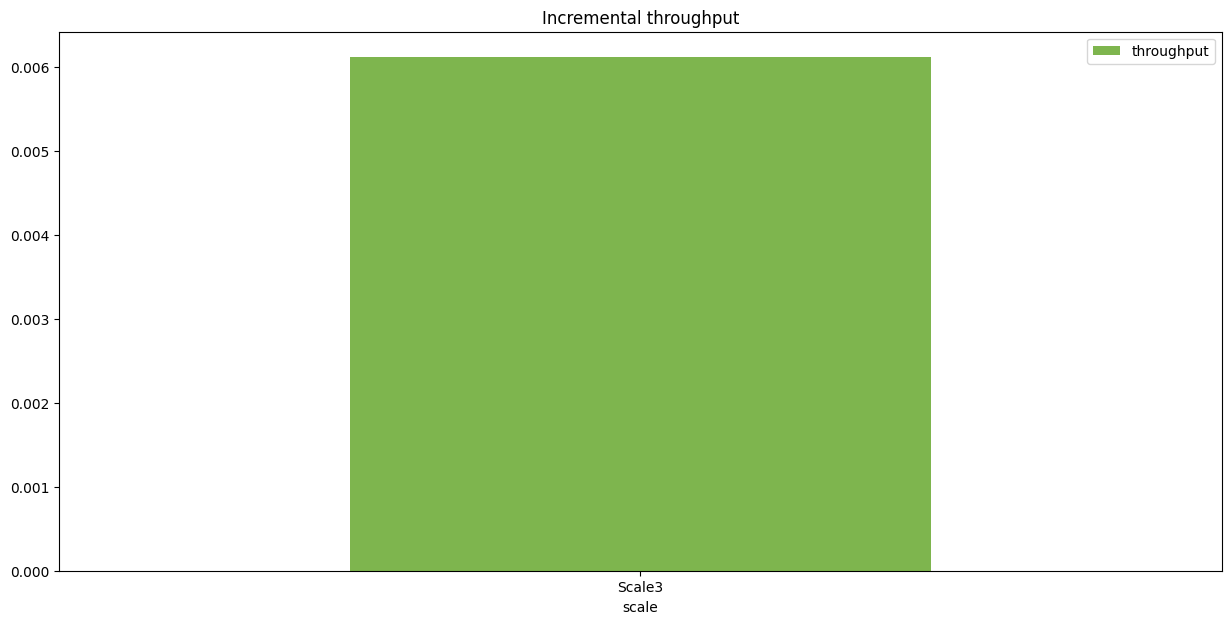

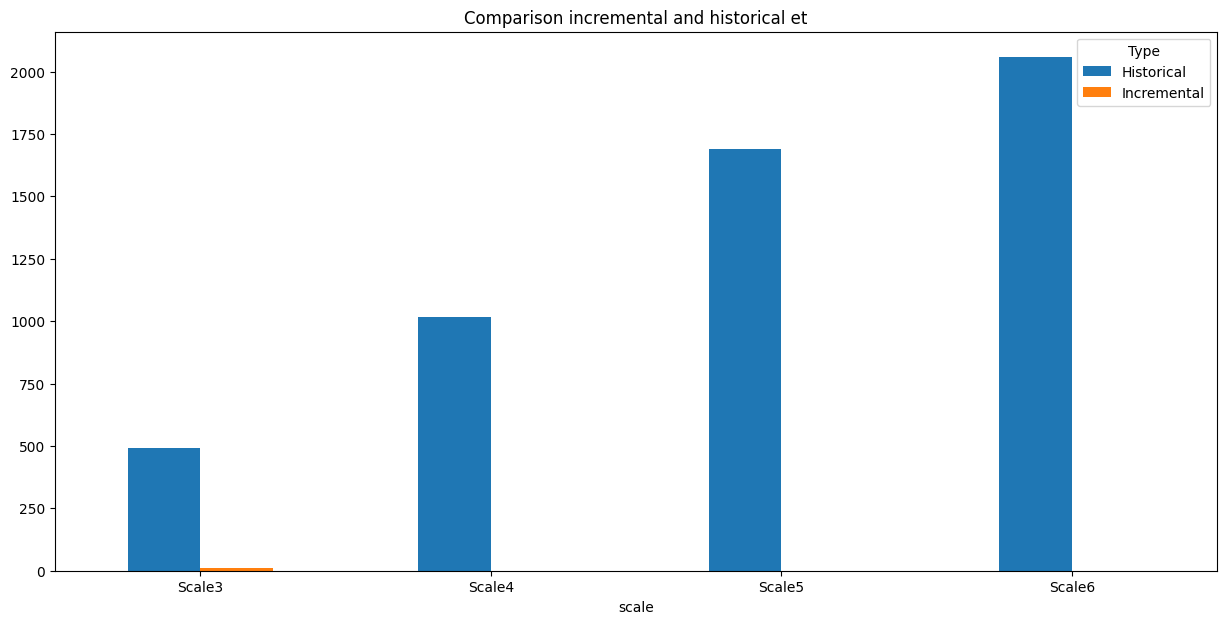

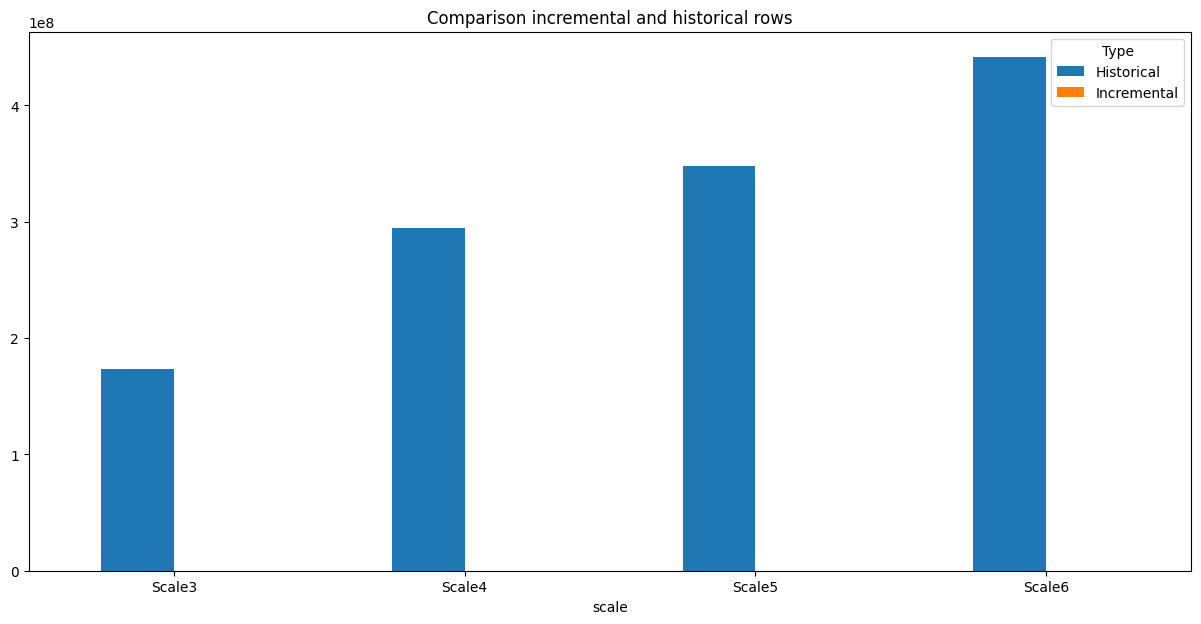

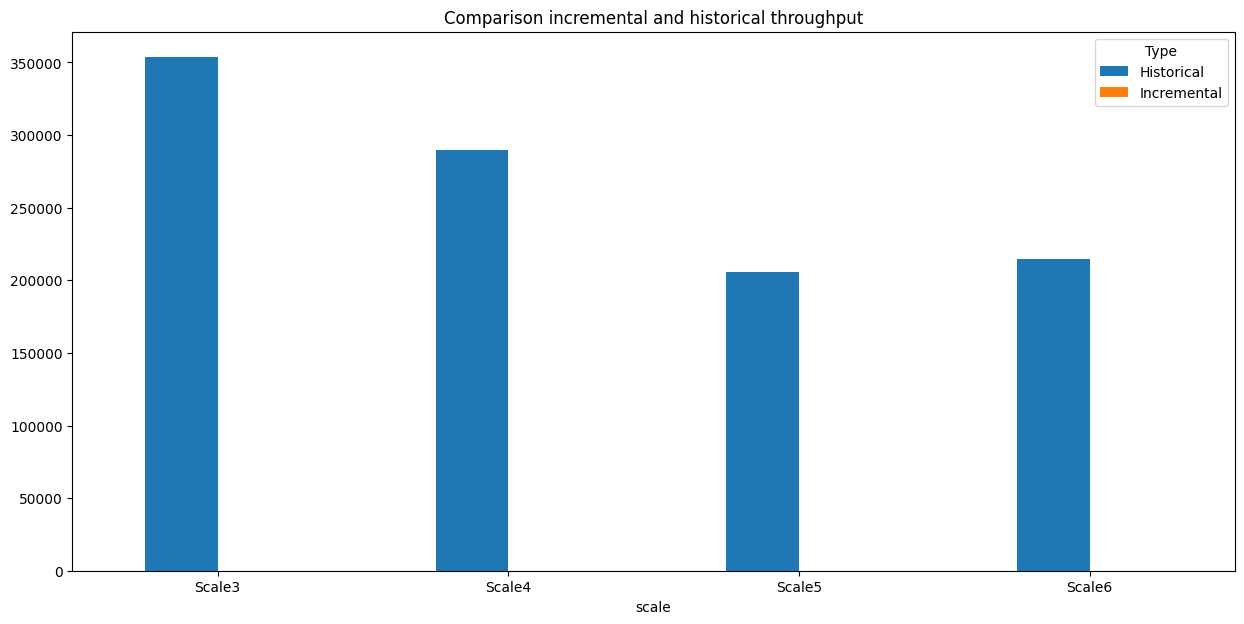

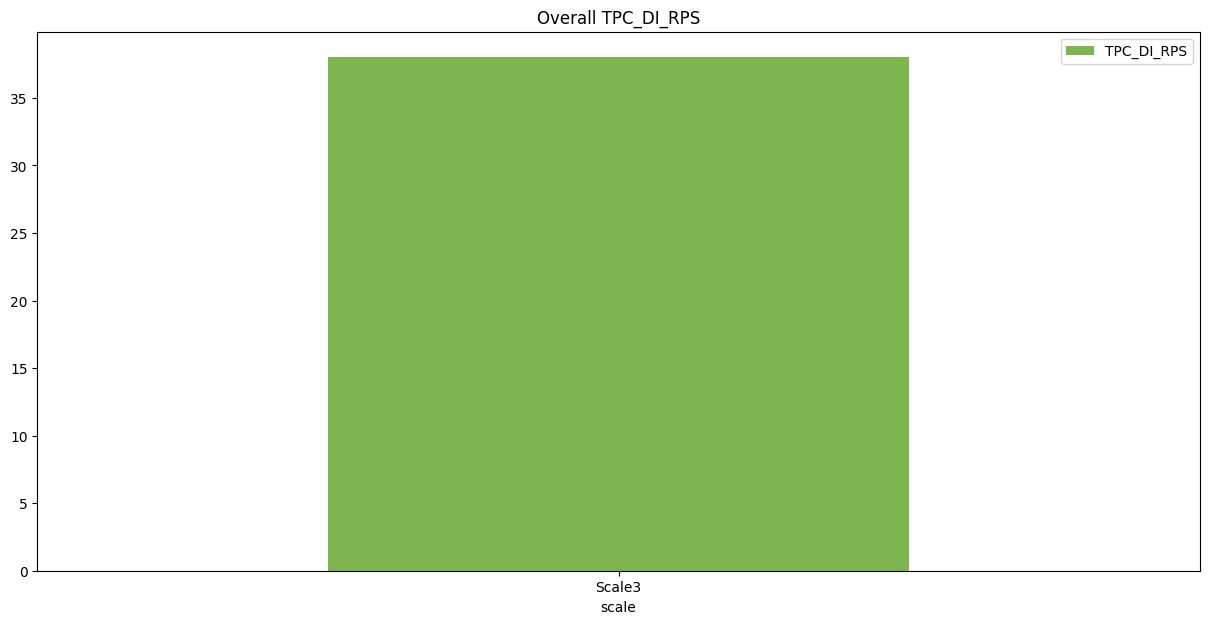

In [54]:
create_mail_images()
